In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import tensorflow as tf





Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [66]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test


def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
def mergeImage(image1, image2):
    newImage = []
    for i1, i2 in zip(image1,image2):
        newImage.append(np.concatenate((i1, i2), axis=None))
#         print("Conc: ",i1 + i2)
#         print("i1: ", i1)
#         print("i2: ", i2)
        i1
    return newImage

In [68]:
#Reshaping each example to 28x28
num = x_train[1].reshape([28,28])
num2 = x_train[2].reshape([28,28])

num3= mergeImage(num, num2)
# num3 = np.array(num3)
num3 = num3.reshape([28,56])

# plt.imshow(num3, cmap=plt.get_cmap('gray_r'))

AttributeError: 'list' object has no attribute 'reshape'

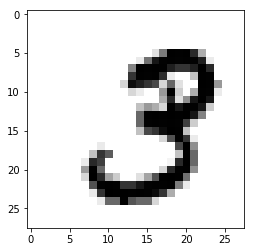

In [55]:
shiftNum = x_train[1].reshape([28,28])

shiftNum = np.roll(shiftNum, 3, axis=1)
plt.imshow(shiftNum, cmap=plt.get_cmap('gray_r'))

In [4]:
x_train, y_train = TRAIN_SIZE(55000)                  #Loading Data
sess = tf.Session()                         #Creatign new session


#Placeholder to feed the data into 
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

#Weights and bias for layer 1
W1 = tf.Variable(tf.truncated_normal([784,400],mean=0,stddev=0.05))             # W = 784 x 10 (784 rows 10 columns)
b1 = tf.Variable(tf.zeros([400]))
a1 = tf.nn.relu((tf.matmul(x,W1) + b1),  name='activationLayer1')                 #Softmax makes it so gradient isnt a  step function

#Layer 2 Weights and bias
W2 = tf.Variable(tf.random_normal([400,200],mean=0,stddev=0.05))
b2 = tf.Variable(tf.zeros([200]))
a2 = tf.nn.relu((tf.matmul(a1,W2)+b2),name='activationLayer2')

# #Layer 3
# W3 = tf.Variable(tf.random_normal([200,100],mean=0,stddev=0.05))
# b3 = tf.Variable(tf.zeros([100]))
# a3 = tf.nn.relu((tf.matmul(a2, W3) + b3), name = 'Layer3')

#Output layer weights and bias 
W4 = tf.Variable(tf.random_normal([200,10],mean=0,stddev=0.05))
b4 = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax((tf.matmul(a2, W4) + b4), name = 'output')



Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



In [5]:
#Setting up Loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [6]:
x_train, y_train = TRAIN_SIZE(55000)
x_test, y_test = TEST_SIZE(1000)
LEARNING_RATE = 0.3
TRAIN_STEPS = 200           #same thing as epoch

len(x_train)


Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (1000, 784)
y_test Examples Loaded = (1000, 10)


55000

In [7]:
#Setting up Optimizer
training = tf.train.AdamOptimizer().minimize(cross_entropy)    #Running gradient descent
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))                         #Check prediction with actual value
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))                     #See your accuracy

In [8]:
#Run the gradient descent multiple times to find right minima
init = tf.global_variables_initializer()
sess.run(init)
batch = 500
for i in range(TRAIN_STEPS+1):
#     for j in range(len(x_train)):
#         start = j
#         end = j+batch
        
#         x_batch = x_train[start:end]
#         y_batch = y_train[start:end]
        
    sess.run(training, feed_dict={x: x_train, y_: y_train})    #Running gradient descent
#         j +=batch
#         print(j)
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.36  Loss = 2.17679
Training Step:100  Accuracy =  0.958  Loss = 0.104304
Training Step:200  Accuracy =  0.979  Loss = 0.0266314


In [9]:
weights = sess.run(W1)
print(weights)
np.savetxt("weights_1.txt", weights)
weights = sess.run(W2)
print(weights)
np.savetxt("weights_2.txt", weights)
weights = sess.run(W4)
print(weights)
np.savetxt("weights_3.txt", weights)
np.savetxt("x_test.txt", x_test)
np.savetxt("y_test.txt", y_test)

[[-0.03589871  0.03331175 -0.04501198 ..., -0.01286113  0.0212121
  -0.05767336]
 [-0.09980341 -0.01979881 -0.0563818  ...,  0.04496438 -0.08127421
  -0.0146857 ]
 [-0.05978919  0.07307463  0.02633315 ...,  0.02010152 -0.00546366
   0.02383367]
 ..., 
 [-0.08793899 -0.03516058  0.01386218 ...,  0.00272071 -0.09279147
   0.09783088]
 [-0.04808396 -0.06513688  0.09350821 ...,  0.03142276 -0.02107956
  -0.04664012]
 [-0.06306105 -0.00533128 -0.02573358 ...,  0.008701    0.03670347
   0.01660397]]
[[-0.07793642  0.03386941 -0.1133942  ...,  0.07245082 -0.0086886
   0.03883033]
 [ 0.00668807 -0.05628867 -0.01425789 ...,  0.02750241  0.03727752
   0.06879383]
 [-0.03607887 -0.06556796 -0.00439632 ...,  0.05940193  0.000828
  -0.04896758]
 ..., 
 [-0.05710496 -0.03797853 -0.00045059 ...,  0.10723866 -0.05312402
   0.0224669 ]
 [ 0.07514062 -0.03122273 -0.03478551 ..., -0.02459484 -0.0657669
  -0.05696115]
 [ 0.05317928 -0.09416101 -0.06456596 ...,  0.02840606  0.00095357
  -0.10643485]]
[[-0.

In [10]:
np.savetxt("x_test.txt", x_test)
np.savetxt("y_test.txt", y_test)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


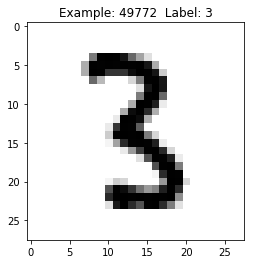

55000


In [28]:
display_digit(ran.randint(0, x_train.shape[0]))
print(x_train.shape[0])